# Configurações iniciais

In [4]:
# importando biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importando pacote pra manipulação de dados
import string #trabalhar com texto
from sklearn.feature_extraction.text import CountVectorizer #transformar texto em matrix numérica


In [5]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pywaffle-0.6.4-py2.py3-none-any.whl (565 kB)


In [6]:
#carregando bases
dt = pd.read_json("receitas.json")


In [7]:
dt.head()

directions   fat  \
0  [1. Place the stock, lentils, celery, carrot, ...   7.0   
1  [Combine first 9 ingredients in heavy medium s...  23.0   
2  [In a large heavy saucepan cook diced fennel a...   7.0   
3  [Heat oil in heavy large skillet over medium-h...   NaN   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...  32.0   

                       date  \
0 2006-09-01 04:00:00+00:00   
1 2004-08-20 04:00:00+00:00   
2 2004-08-20 04:00:00+00:00   
3 2009-03-27 04:00:00+00:00   
4 2004-08-20 04:00:00+00:00   

                                          categories  calories  \
0  [Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...     426.0   
1  [Food Processor, Onion, Pork, Bake, Bastille D...     403.0   
2  [Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...     165.0   
3  [Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...       NaN   
4  [Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...     547.0   

                                                desc  protein  rating  \
0                                               None     30.0   2.500   
1  This uses the same ingredients found in boudin...     18.0   4.375   
2                                               None      6.0   3.750   
3  The Sicilian-style tomato sauce has tons of Me...      NaN   5.000   
4                                               None     20.0   3.125   

                                         title  \
0              Lentil, Apple, and Turkey Wrap    
1  Boudin Blanc Terrine with Red Onion Confit    
2                Potato and Fennel Soup Hodge    
3             Mahi-Mahi in Tomato Olive Sauce    
4                    Spinach Noodle Casserole    

                                         ingredients  sodium  
0  [4 cups low-sodium vegetable or chicken stock,...   559.0  
1  [1 1/2 cups whipping cream, 2 medium onions, c...  1439.0  
2  [1 fennel bulb (sometimes called anise), stalk...   165.0  
3  [2 tablespoons extra-virgin olive oil, 1 cup c...     NaN  
4  [1 12-ounce package frozen spinach soufflé, th...   452.0

In [8]:
dt.tail()

directions   fat  \
20125  [Beat whites in a bowl with an electric mixer ...   2.0   
20126  [Bring broth to simmer in saucepan.Remove from...  28.0   
20127  [Using a sharp knife, cut a shallow X in botto...  38.0   
20128  [Heat 2 tablespoons oil in heavy medium skille...  24.0   
20129  [Position rack in bottom third of oven and pre...  10.0   

                           date  \
20125 2004-08-20 04:00:00+00:00   
20126 2008-02-28 22:06:54+00:00   
20127 2005-10-21 18:21:20+00:00   
20128 2004-08-20 04:00:00+00:00   
20129 2004-08-20 04:00:00+00:00   

                                              categories  calories  \
20125  [Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...      28.0   
20126  [Side, Kid-Friendly, High Fiber, Dinner, Parme...     671.0   
20127  [Onion, Poultry, turkey, Vegetable, Bake, Kid-...     563.0   
20128  [Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...     631.0   
20129  [Pork, Bake, Roast, Christmas, Ham, Winter, Bo...     560.0   

                                                    desc  protein  rating  \
20125                                               None      2.0   3.125   
20126  Cooking the artichokes with the rice infuses t...     22.0   4.375   
20127                                               None     31.0   4.375   
20128  Sharon Hooykaas of Los Alamitos, California, w...     45.0   4.375   
20129  Although labeled fully cooked, the ham will st...     73.0   4.375   

                                             title  \
20125                              Parmesan Puffs    
20126              Artichoke and Parmesan Risotto    
20127                       Turkey Cream Puff Pie    
20128     Snapper on Angel Hair with Citrus Cream    
20129  Baked Ham with Marmalade-Horseradish Glaze    

                                             ingredients  sodium  
20125  [2 large egg whites, 3 oz Parmigiano-Reggiano,...    64.0  
20126  [5 1/2 cups (or more) low-salt chicken broth, ...   583.0  
20127  [1 small tomato, 1 small onion, finely chopped...   652.0  
20128  [4 tablespoons olive oil, 4 shallots, thinly s...   517.0  
20129  [1 18-pound fully cooked bone-in smoked ham, r...  3698.0

In [9]:
# Convertendo colunas de type list para str e realizando cópia do dataframe
dt_ = dt.copy()
dt_["directions"]=dt["directions"].apply(str)
dt_["categories"]=dt["categories"].apply(str)
dt_["ingredients"]=dt["ingredients"].apply(str)


In [10]:
#Numero de linhas e colunas
print(f'Número de linhas {dt.shape[0]}')
print(f'Número de colunas {dt.shape[1]}')

Número de linhas 20130
Número de colunas 11


In [11]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Preparação dos dados


## Verificação dos valores númericos

In [12]:
## corrigindo campos numéricos
dt_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20130 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20130 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20130 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


É percebido que todas as colunas estão de fato com tipo de dado correto para seus respectivo conjunto de dados

## Verificação de dados duplicados

Tarefa importante na etapa de limpeza e preparação de dados é a correção de dados duplicados, por mais que, possivelmente, esse conjunto de dados não possua dados duplicados, por o conjunto de dados já está um pouco limpo, é comum encontrar em alguns conjuntos de dados. Os valores duplicados na maioria dos conjuntos de dados são encontrados com frequência e dependendo da análise que será feita, esses valores podem alterar o resultado final.



In [13]:
dt_[dt_.duplicated(keep=False)]

directions   fat  \
14     ['Using the tip of a paring knife, score an X ...   3.0   
17     ['Put oven rack in lower third of oven and pre...  68.0   
24     ['Preheat oven to 325°F. Toss pecans and melte...  30.0   
25     ['Mince garlic and mash to a paste with a pinc...   7.0   
27     ['Preheat oven to 275°F. Mix sugar and spices ...   0.0   
...                                                  ...   ...   
20110  ['Makes enough spice rub for two whole chicken...   0.0   
20117  ['Bring half-and-half with cauliflower, covere...  28.0   
20119  ['In a large pot, place the chicken legs, bay ...  59.0   
20120  ['Bring all ingredients to a simmer, covered d...   NaN   
20123  ['Stir water, sugar and juice in saucepan over...   0.0   

                           date  \
14    2014-06-17 04:00:00+00:00   
17    2007-02-14 21:13:14+00:00   
24    2007-01-18 04:25:29+00:00   
25    2004-08-20 04:00:00+00:00   
27    2007-07-26 17:36:37+00:00   
...                         ...   
20110 2013-06-10 04:00:00+00:00   
20117 2006-05-16 20:12:06+00:00   
20119 2012-10-10 04:00:00+00:00   
20120 2006-05-16 20:12:06+00:00   
20123 2004-08-20 04:00:00+00:00   

                                              categories  calories  \
14     ['Sauce', 'Mustard', 'Peach', 'Chive', 'Bon Ap...     134.0   
17     ['Onion', 'Pork', 'Vegetable', 'Braise', 'Saut...     890.0   
24     ['Nut', 'Bake', 'Cocktail Party', 'Super Bowl'...     279.0   
25     ['Bread', 'Condiment/Spread', 'Fry', 'No-Cook'...      95.0   
27     ['Bake', 'Kid-Friendly', 'Pear', 'Spice', 'Hea...      14.0   
...                                                  ...       ...   
20110  ['Low Fat', 'Vegetarian', 'Quick & Easy', 'Spi...      16.0   
20117  ['Milk/Cream', 'Blender', 'Vegetable', 'Side',...     364.0   
20119  ['Wine', 'Chicken', 'Herb', 'Poultry', 'Dinner...     843.0   
20120  ['Food Processor', 'Fruit', 'Side', 'Vegetaria...       NaN   
20123  ['Sauce', 'Fruit', 'Dessert', 'Quick & Easy', ...     182.0   

                                                    desc  protein  rating  \
14     Where a chutney and mustard sauce overlap. Cho...      4.0   3.125   
17     Pork all over Denmark is hauntingly tender. Ru...     59.0   4.375   
24                                                  None      3.0   3.750   
25                                                  None      1.0   0.000   
27     Use a V-slicer (a simple, inexpensive version ...      0.0   2.500   
...                                                  ...      ...     ...   
20110  You can use this simple formula to wake up the...      0.0   4.375   
20117  The leftover cooking liquid makes the perfect ...     11.0   3.125   
20119  My brother, Al, is an inspiring teacher at Jam...     59.0   2.500   
20120  This recipe is an accompaniment for Rack of La...      NaN   2.500   
20123  This recipe was created to accompany <epirecip...      1.0   3.750   

                                    title  \
14                         Peach Mustard    
17           Crisp Braised Pork Shoulder    
24               Sea Salt-Roasted Pecans    
25                Garlic Baguette Crumbs    
27                     Dried Pear Crisps    
...                                   ...   
20110                  4-3-2-1 Spice Rub    
20117                  Cauliflower Purée    
20119  Chicken with White Wine and Herbs    
20120                         Date Purée    
20123                  Blueberry Compote    

                                             ingredients  sodium  
14     ['1 large ripe peach', '2 tablespoons sugar', ...  1394.0  
17     ['1 (4 1/2-lb) solid piece boneless pork shoul...  1027.0  
24     ['2 cups pecan halves', '3 tablespoons unsalte...   206.0  
25     ['1 garlic clove', '2 tablespoons olive oil', ...   103.0  
27     ['1 tablespoon sugar', '1/4 teaspoon ground gi...     0.0  
...                                                  ...     ...  
20110  ['4 tablespoons kosher salt', '3 tablespoons b...

É possível perceber que existe receitas duplicadas no dataframe, com objetivo de quantificar as duplicadas é exibido a seguir:


In [14]:
dt_.duplicated().sum()

1834

Com finalidade de não existir mais receitas duplicadas no dataset será excluído a duplicação

In [15]:
dt_ = dt_.drop_duplicates(subset=dt_.columns)

## Outliers

Após os outliers terem sido identificados, sua remoção ou transformação só deve ser feita se realmente fizer sentido, logo, deve ser levado em consideração que alguns outliers são dados autenticos e devem ser estudados com atenção, para saber se de fato deve ser feita sua remoção

Podemos identificar um outlier de diversas formas, entre elas podemos citar:

* IQR Score
* Boxplots
* Scatter plots
* Z-Score

É decidido adotar as seguintes estratégias, sendo consideradas simples, todavia eficientes para identificar a existência de outliers.:


*   O `Boxplot` porque o mesmo indicar explicitamente quando os conjuntos de dados contêm valores discrepantes.


*   O `IQR Scores` para definir os limites superiores e inferiores de cada variável suspeita, com a finalidade de identificar os outliers, e caso necessário definir com facilidade o corte e remover os outliers.

 


Já em relação as demais estratégias não adotadas, segue a justificativa:

*   O `Scatter plots` exibe gráfico de dispersão para detectar valores discrepantes em uma configuração multivariada. Todavia queremos necesse momento do problema é necessitado ter visão univariada para identificar os valores discrepantes, por isso que é utilizado o `Boxplot`.

*   O `Z-Score` é quantificar a inusitabilidade de uma observação quando seus dados seguem a distribuição normal e quando o número de desvios padrão acima e abaixo da média em que cada valor cai. Por exemplo,  um escore Z de -2 significa que está dois desvios padrão abaixo da média. Um Z-score de zero representa um valor que é igual à média. **É uma estratégia interessante, todavia para esse tipo de problema não fornece informações mais detalhadas para definir por exemplo recorte e remoção de determinados outliers.**






Vamos utilizar o método describe, agora mais focado em tentar identificar se existem dados discrepantes no conjunto de dados. Então, ao analisar o resultado estatistico fornecido pelo método describe, precisamos observar o quão os valores, por exemplo, valor min e o valor máximo estão distantes (discrepantes).

In [16]:
dt_.describe()

fat      calories        protein        rating        sodium
count  1.447900e+04  1.453200e+04   14499.000000  18285.000000  1.453100e+04
mean   3.627313e+02  6.609487e+03      92.074281      3.713187  6.561556e+03
std    2.133631e+04  3.743950e+05    3508.244063      1.335423  3.480575e+05
min    0.000000e+00  0.000000e+00       0.000000      0.000000  0.000000e+00
25%    8.000000e+00  2.050000e+02       3.000000      3.750000  8.800000e+01
50%    1.800000e+01  3.450000e+02       9.000000      4.375000  3.040000e+02
75%    3.400000e+01  5.990000e+02      28.000000      4.375000  7.320000e+02
max    1.722763e+06  3.011122e+07  236489.000000      5.000000  2.767511e+07

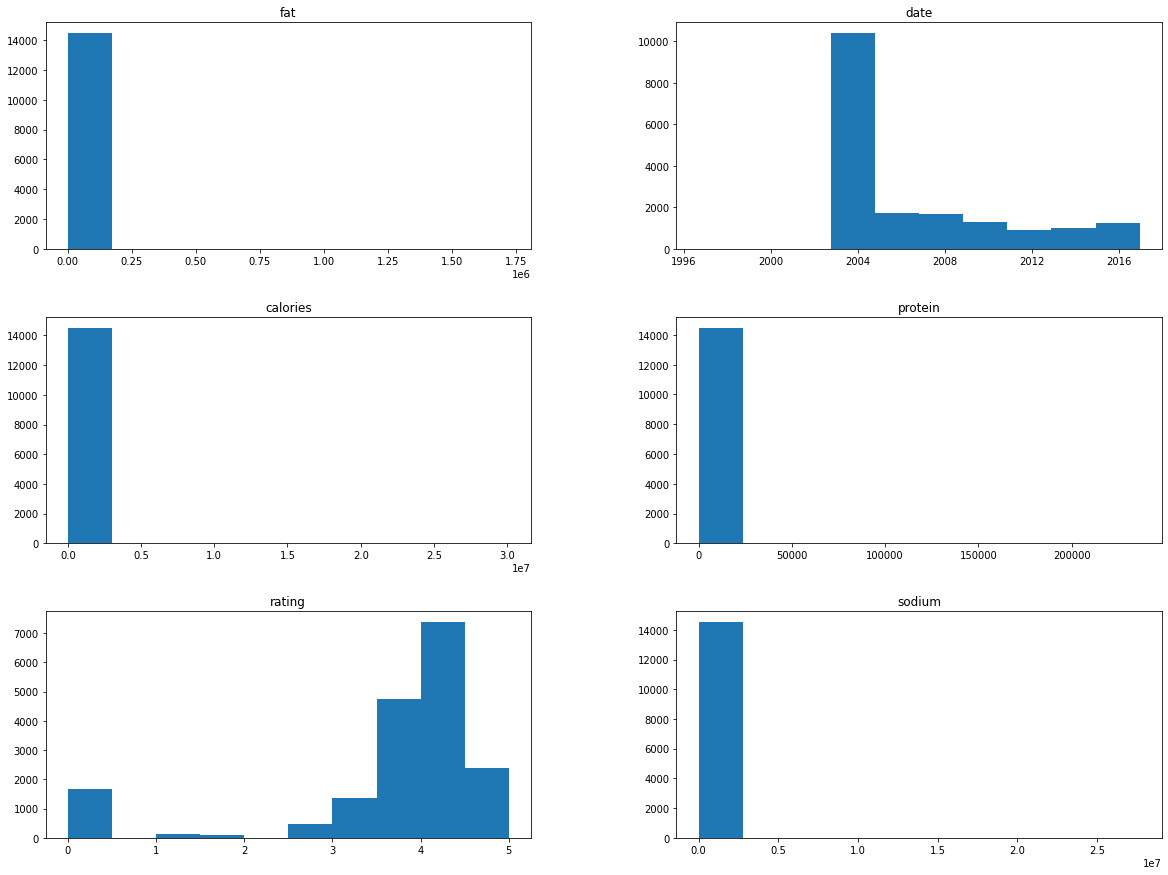

In [17]:
# verificando as distribuições
dt_.hist(figsize=(20,15), grid=False);

**Há outliers?**

Por meio do recurso `describe` é possível ter a liberdade de informar que possivelemnte a `target`, `X4` e `X5`podem estarem como as features que possuem mais representatividade de outliers.

E com o uso da distribuição do histograma fica evidente a presença de *outliers*.


Todavia, com intuito de comprovar de fato a situação do dataset quanto a outliers será utilizado as duas estratégias de identificar outliers mencionadas anteriormente que são: `boxplot`e `IQR Scores`.

Depois de realizar as duas estratégias foram adquiridas as seguintes informações:

In [18]:
# definindo quartile 1 (Q1) que é o 25%, definindo quartile 3 (Q3) que é o 75% e obtendo por fim o resultado da IQR
q1_target = dt_.calories.quantile(.25)
q3_target = dt_.calories.quantile(.75)
iqr_target = q3_target - q1_target
print ("O IQR da área media é: ", iqr_target)

# definindo os limites superior e inferior da variável
sup_target = q3_target + 1.5 * iqr_target
inf_target = q1_target - 1.5 * iqr_target

print ("O limite superior é: ", sup_target)
print ("O limite inferior é: ", inf_target)

O IQR da área media é:  394.0
O limite superior é:  1190.0
O limite inferior é:  -386.0


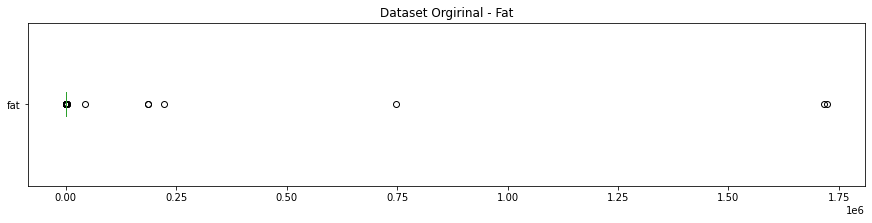

 O dataset possui 18296 entradas
 984 Entradas acima de 73.0
 Representam 5.38% do dataset


In [19]:
# verificando conjunto original com Box Plot e usando resultados obtidos no IQR
fig, ax = plt.subplots(figsize=(15,3))
dt_.fat.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Fat')
plt.show()
print(" O dataset possui {} entradas".format(dt_.shape[0]))
print(" {} Entradas acima de 73.0".format(len(dt_[dt_.fat > 73.0])))
print(" Representam {:.2f}% do dataset".format((len(dt_[dt_.fat > 73.0]) / dt_.shape[0])*100))

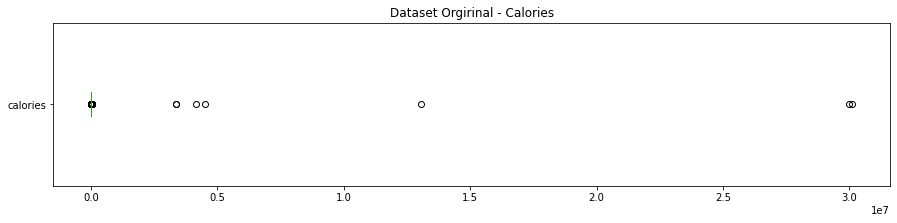

 O dataset possui 18296 entradas
 907 Entradas acima de 1190.0
 Representam 4.96% do dataset


In [20]:
# verificando conjunto original com Box Plot e usando resultados obtidos no IQR
fig, ax = plt.subplots(figsize=(15,3))
dt_.calories.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Calories')
plt.show()
print(" O dataset possui {} entradas".format(dt_.shape[0]))
print(" {} Entradas acima de 1190.0".format(len(dt_[dt_.calories > 1190.0])))
print(" Representam {:.2f}% do dataset".format((len(dt_[dt_.calories > 1190.0]) / dt_.shape[0])*100))

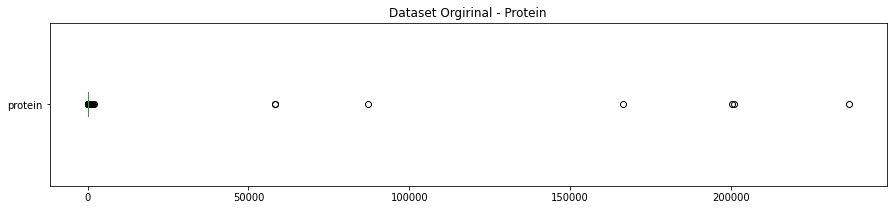

 O dataset possui 18296 entradas
 991 Entradas acima de 65.5
 Representam 5.42% do dataset


In [21]:
# verificando conjunto original com Box Plot e usando resultados obtidos no IQR
fig, ax = plt.subplots(figsize=(15,3))
dt_.protein.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Protein')
plt.show()
print(" O dataset possui {} entradas".format(dt_.shape[0]))
print(" {} Entradas acima de 65.5".format(len(dt_[dt_.protein > 65.5])))
print(" Representam {:.2f}% do dataset".format((len(dt_[dt_.protein > 65.5]) / dt_.shape[0])*100))

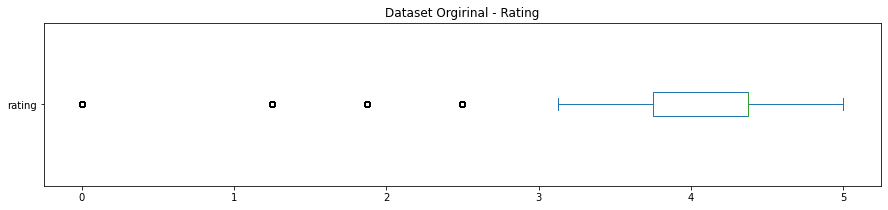

 O dataset possui 18296 entradas
 2405 Entradas abaixo de 2.8125
 Representam 13.14% do dataset


In [22]:
# verificando conjunto original com Box Plot e usando resultados obtidos no IQR
fig, ax = plt.subplots(figsize=(15,3))
dt_.rating.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Rating')
plt.show()
print(" O dataset possui {} entradas".format(dt_.shape[0]))
print(" {} Entradas abaixo de 2.8125".format(len(dt_[dt_.rating < 2.8125])))
print(" Representam {:.2f}% do dataset".format((len(dt_[dt_.rating < 2.8125]) / dt_.shape[0])*100))

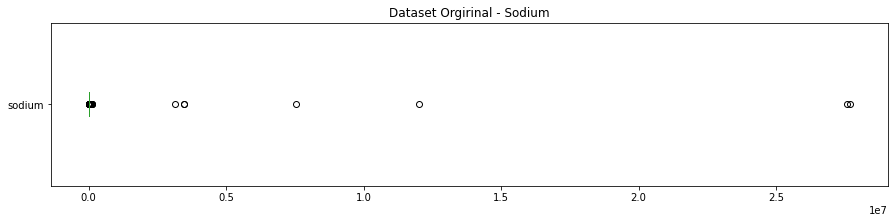

 O dataset possui 18296 entradas
 1040 Entradas acima de 1698.0
 Representam 5.68% do dataset


In [23]:
# verificando conjunto original com Box Plot e usando resultados obtidos no IQR
fig, ax = plt.subplots(figsize=(15,3))
dt_.sodium.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Sodium')
plt.show()
print(" O dataset possui {} entradas".format(dt_.shape[0]))
print(" {} Entradas acima de 1698.0".format(len(dt_[dt_.sodium > 1698.0])))
print(" Representam {:.2f}% do dataset".format((len(dt_[dt_.sodium > 1698.0]) / dt_.shape[0])*100))

O resultado é exibido a seguir de maneira decrescente em termos de percentual do outliers no dataset:

*   `sodium`: 1040 Entradas acima de 1698.0 representam **5.68%** do dataset

*   `protein`: 991 Entradas acima de 65.5 representam **5.42%** do dataset

*   `fat`: 984 Entradas acima de 73.0 representam **5.38%** 
do dataset

*   `calories`: 907 Entradas acima de 1190.0 representam **4.96%** do dataset

*   `rating`: 2405 Entradas abaixo de 2.8125 representam **13.14%** do dataset




**E agora, removemos todos os outliers do dataset?**

É decidido não ser removido os outliers encontrados, porque entende-se que as representatividades encontradas são consideráveis, e podem permanecer.

Todavia, com finalidade de gerar representações fidedignas a realidade, será utilizado o recurso `query` com finalidade de se fazer filtragens no dataframa com base nas descobertas.

## Verificação dos valores ausentes

In [24]:
# ver a quantidade de valores ausentes em percentual
dt.isnull().sum() / dt.shape[0]

directions     0.000944
fat            0.209737
date           0.000944
categories     0.000944
calories       0.206359
desc           0.329608
protein        0.208693
rating         0.001490
title          0.000944
ingredients    0.000944
sodium         0.206458
dtype: float64

## NLP (Natural Language Processin)

Aplicações



*   `categorização do conteúdo` - resumo de um documento/texto
*   `descoberta e modelagem de tópicos` - capturar os temas em correlações do texto
*   `extração contextual` - extrair automaticamente informações
*   `tradução`
*    `análise de sentimentos` - identificar opiniões subjetivas no texto
*   `conversão fala-texto e texto-fala`
*   `sumarização` - sinopses de grandes corpos de textos (filmes)


O presente problema não demanda que seja utilizado o NLP com a finalidade de: análise de sentimentos, converter fala em texto ou vice versa, tradução.

A essencial deste problema demanda que NLP seja aplicada para ser realizado análise descritiva, ou seja, extração contextual, sumarização, descobertas de temas em correlação com texto.

Pacotes de NLP

*   `nltk` - essencialmente uma biblioteca de processamento de strings, onde cada função recebe strings como entrada e retorna uma string processada.

*   `spacy` - adota uma abordagem orientada a objetos. Cada função retorna objetos em vez de strings ou arrays.

No presente problema será usado do pacote `nltk` porque o mesmo será suficiente para realizar análise descritiva, sendo analisado a frequencia absoluta, relativa, além disso, trata-se de um pacote que promoverá eficácia e rapidez para se obter o teor informacional do presente problema.

Processo NLP

*   `padronizar texto`
*   `eliminar pontuações`
*   `eliminar caracteres especiais`
*   `eliminar stopwords`
*   `eliminar números`
*   `stemming` - reduzir palavra ao radical
*   `lematização` - reduzir palavra ao lema, masculino e singular
*   `bag of words` - matrix de palavras com frequência absoluta

Dentre todas as etapas do processo, o único que não será adotado nesse contexto será o `eliminar números`porque é importante entender, por exemplo nos ingredientes a quantidade de cada ingrediente adicionada na receita.

A seguir segue a efetuação das etapas mencionadas anteriormente para as colunas de:

*   `title`
*   `directions`
*   `categories`
*   `ingredients`
*   `desc`

Tais colunas foram escolhidas porque as mesmas contém informações valiosas em caracteres




In [25]:
# BAIXANDO BASE DE DADOS COM STOPWORDS
import nltk #pacote focado em NLP
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
# BAIXANDO BASE DE DADOS COM STOPWORDS
import nltk #pacote focado em NLP
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords

# CARREGANDO STOPWORDS EM inglês
stopwords_en = stopwords.words("english")
stopwords_en[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### Ingredientes das receitas


In [28]:
#Titulos das receitas
dt_.ingredients.unique()

array(["['4 cups low-sodium vegetable or chicken stock', '1 cup dried brown lentils', '1/2 cup dried French green lentils', '2 stalks celery, chopped', '1 large carrot, peeled and chopped', '1 sprig fresh thyme', '1 teaspoon kosher salt', '1 medium tomato, cored, seeded, and diced', '1 small Fuji apple, cored and diced', '1 tablespoon freshly squeezed lemon juice', '2 teaspoons extra-virgin olive oil', 'Freshly ground black pepper to taste', '3 sheets whole-wheat lavash, cut in half crosswise, or 6 (12-inch) flour tortillas', '3/4 pound turkey breast, thinly sliced', '1/2 head Bibb lettuce']",
       "['1 1/2 cups whipping cream', '2 medium onions, chopped', '5 teaspoons salt', '3 bay leaves', '3 whole cloves', '1 large garlic clove, crushed', '1 teaspoon pepper', '1/8 teaspoon ground nutmeg', 'Pinch of dried thyme, crumbled', '8 large shallots, minced', '1 tablespoon butter', '1 pound trimmed boneless center pork loin, sinew removed cut into 1-inch chunks, well chilled', '3 eggs', '6 

In [29]:
## padronizando para minusculo
dt_.ingredients = dt_.ingredients.str.lower()
dt_.ingredients.unique()

array(["['4 cups low-sodium vegetable or chicken stock', '1 cup dried brown lentils', '1/2 cup dried french green lentils', '2 stalks celery, chopped', '1 large carrot, peeled and chopped', '1 sprig fresh thyme', '1 teaspoon kosher salt', '1 medium tomato, cored, seeded, and diced', '1 small fuji apple, cored and diced', '1 tablespoon freshly squeezed lemon juice', '2 teaspoons extra-virgin olive oil', 'freshly ground black pepper to taste', '3 sheets whole-wheat lavash, cut in half crosswise, or 6 (12-inch) flour tortillas', '3/4 pound turkey breast, thinly sliced', '1/2 head bibb lettuce']",
       "['1 1/2 cups whipping cream', '2 medium onions, chopped', '5 teaspoons salt', '3 bay leaves', '3 whole cloves', '1 large garlic clove, crushed', '1 teaspoon pepper', '1/8 teaspoon ground nutmeg', 'pinch of dried thyme, crumbled', '8 large shallots, minced', '1 tablespoon butter', '1 pound trimmed boneless center pork loin, sinew removed cut into 1-inch chunks, well chilled', '3 eggs', '6 

In [30]:
## retirando qualquer pontuação 
dt_.ingredients = dt_.ingredients.replace("[^\w\s]"," ",regex=True)
dt_.ingredients.unique()

array(['  4 cups low sodium vegetable or chicken stock    1 cup dried brown lentils    1 2 cup dried french green lentils    2 stalks celery  chopped    1 large carrot  peeled and chopped    1 sprig fresh thyme    1 teaspoon kosher salt    1 medium tomato  cored  seeded  and diced    1 small fuji apple  cored and diced    1 tablespoon freshly squeezed lemon juice    2 teaspoons extra virgin olive oil    freshly ground black pepper to taste    3 sheets whole wheat lavash  cut in half crosswise  or 6  12 inch  flour tortillas    3 4 pound turkey breast  thinly sliced    1 2 head bibb lettuce  ',
       '  1 1 2 cups whipping cream    2 medium onions  chopped    5 teaspoons salt    3 bay leaves    3 whole cloves    1 large garlic clove  crushed    1 teaspoon pepper    1 8 teaspoon ground nutmeg    pinch of dried thyme  crumbled    8 large shallots  minced    1 tablespoon butter    1 pound trimmed boneless center pork loin  sinew removed cut into 1 inch chunks  well chilled    3 eggs    6 

In [31]:
## retirando espaços em brancos duplicados
dt_.ingredients = dt_.ingredients.replace("\\s+"," ",regex=True )
dt_.ingredients.unique()

array([' 4 cups low sodium vegetable or chicken stock 1 cup dried brown lentils 1 2 cup dried french green lentils 2 stalks celery chopped 1 large carrot peeled and chopped 1 sprig fresh thyme 1 teaspoon kosher salt 1 medium tomato cored seeded and diced 1 small fuji apple cored and diced 1 tablespoon freshly squeezed lemon juice 2 teaspoons extra virgin olive oil freshly ground black pepper to taste 3 sheets whole wheat lavash cut in half crosswise or 6 12 inch flour tortillas 3 4 pound turkey breast thinly sliced 1 2 head bibb lettuce ',
       ' 1 1 2 cups whipping cream 2 medium onions chopped 5 teaspoons salt 3 bay leaves 3 whole cloves 1 large garlic clove crushed 1 teaspoon pepper 1 8 teaspoon ground nutmeg pinch of dried thyme crumbled 8 large shallots minced 1 tablespoon butter 1 pound trimmed boneless center pork loin sinew removed cut into 1 inch chunks well chilled 3 eggs 6 tablespoon all purpose flour 1 4 cup tawny port 3 tablespoons dried currants minced lettuce leaves cr

In [32]:
# loop para percorer cada linha e remover os stopwords
text_clean = []
for text in dt_.ingredients:
  t = ' '.join([word for word in text.split() if word not in stopwords_en])
  text_clean.append(t)

text_clean[:5]

['4 cups low sodium vegetable chicken stock 1 cup dried brown lentils 1 2 cup dried french green lentils 2 stalks celery chopped 1 large carrot peeled chopped 1 sprig fresh thyme 1 teaspoon kosher salt 1 medium tomato cored seeded diced 1 small fuji apple cored diced 1 tablespoon freshly squeezed lemon juice 2 teaspoons extra virgin olive oil freshly ground black pepper taste 3 sheets whole wheat lavash cut half crosswise 6 12 inch flour tortillas 3 4 pound turkey breast thinly sliced 1 2 head bibb lettuce',
 '1 1 2 cups whipping cream 2 medium onions chopped 5 teaspoons salt 3 bay leaves 3 whole cloves 1 large garlic clove crushed 1 teaspoon pepper 1 8 teaspoon ground nutmeg pinch dried thyme crumbled 8 large shallots minced 1 tablespoon butter 1 pound trimmed boneless center pork loin sinew removed cut 1 inch chunks well chilled 3 eggs 6 tablespoon purpose flour 1 4 cup tawny port 3 tablespoons dried currants minced lettuce leaves cracked peppercorns minced fresh parsley bay leaves f

In [33]:
dt_['ingredients'].shape

(18296,)

In [34]:
# inserindo texto sem stopwords na coluna do dataframe 
dt_['ingredients'] = text_clean
dt_.head(5)

directions   fat  \
0  ['1. Place the stock, lentils, celery, carrot,...   7.0   
1  ['Combine first 9 ingredients in heavy medium ...  23.0   
2  ['In a large heavy saucepan cook diced fennel ...   7.0   
3  ['Heat oil in heavy large skillet over medium-...   NaN   
4  ['Preheat oven to 350°F. Lightly grease 8x8x2-...  32.0   

                       date  \
0 2006-09-01 04:00:00+00:00   
1 2004-08-20 04:00:00+00:00   
2 2004-08-20 04:00:00+00:00   
3 2009-03-27 04:00:00+00:00   
4 2004-08-20 04:00:00+00:00   

                                          categories  calories  \
0  ['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turke...     426.0   
1  ['Food Processor', 'Onion', 'Pork', 'Bake', 'B...     403.0   
2  ['Soup/Stew', 'Dairy', 'Potato', 'Vegetable', ...     165.0   
3  ['Fish', 'Olive', 'Tomato', 'Sauté', 'Low Fat'...       NaN   
4  ['Cheese', 'Dairy', 'Pasta', 'Vegetable', 'Sid...     547.0   

                                                desc  protein  rating  \
0                                               None     30.0   2.500   
1  This uses the same ingredients found in boudin...     18.0   4.375   
2                                               None      6.0   3.750   
3  The Sicilian-style tomato sauce has tons of Me...      NaN   5.000   
4                                               None     20.0   3.125   

                                         title  \
0              Lentil, Apple, and Turkey Wrap    
1  Boudin Blanc Terrine with Red Onion Confit    
2                Potato and Fennel Soup Hodge    
3             Mahi-Mahi in Tomato Olive Sauce    
4                    Spinach Noodle Casserole    

                                         ingredients  sodium  
0  4 cups low sodium vegetable chicken stock 1 cu...   559.0  
1  1 1 2 cups whipping cream 2 medium onions chop...  1439.0  
2  1 fennel bulb sometimes called anise stalks di...   165.0  
3  2 tablespoons extra virgin olive oil 1 cup cho...     NaN  
4  1 12 ounce package frozen spinach soufflé thaw...   452.0

In [35]:
# matrix de "bag of word" COM BI-GRAM(2 palvras)
# Transformando nosso montante de caracteres em uma matrix em que é combinado duas palavras no mínimo e máximo.
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2),min_df=2) # Combinar no mínimo duas palavras e no máximo duas palavras
matrix_bigram = vectorizer_bigram.fit_transform(dt_.ingredients)

freq_bigram_ing = matrix_bigram.toarray().sum(axis=0)
bigram_ing = vectorizer_bigram.get_feature_names()

matrix_bigram.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(18296, 36282)

In [36]:
df_freq_bigram_ing = pd.DataFrame({'ingredientes':bigram_ing,'freq':freq_bigram_ing})
df_freq_bigram_ing = df_freq_bigram_ing.sort_values('freq',ascending=False)
df_freq_bigram_ing

ingredientes  freq
19556        olive oil  6820
5534     chopped fresh  5299
34486  unsalted butter  4498
11505   finely chopped  4039
32529    teaspoon salt  3736
...                ...   ...
18191     milk coconut     2
18195    milk crumbled     2
18196      milk crumbs     2
18199       milk dairy     2
36281    épices french     2

[36282 rows x 2 columns]

### Categorias das receitas


In [37]:
# Categorias
dt_.categories.unique()

array(["['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turkey', 'Vegetable', 'Kid-Friendly', 'Apple', 'Lentil', 'Lettuce', 'Cookie']",
       '[\'Food Processor\', \'Onion\', \'Pork\', \'Bake\', \'Bastille Day\', "New Year\'s Eve", \'Dried Fruit\', \'Port\', \'Winter\', \'Chill\', \'Bon Appétit\']',
       "['Soup/Stew', 'Dairy', 'Potato', 'Vegetable', 'Fennel', 'Gourmet', 'New York']",
       ...,
       "['Onion', 'Poultry', 'turkey', 'Vegetable', 'Bake', 'Kid-Friendly', 'Dinner', 'Fall', 'Pastry', 'Gourmet', 'Sugar Conscious', 'Peanut Free', 'Tree Nut Free', 'Soy Free', 'No Sugar Added']",
       "['Milk/Cream', 'Citrus', 'Dairy', 'Fish', 'Garlic', 'Pasta', 'Sauté', 'Quick & Easy', 'Orange', 'Snapper', 'Summer', 'Pan-Fry', 'Bon Appétit']",
       "['Pork', 'Bake', 'Roast', 'Christmas', 'Ham', 'Winter', 'Bon Appétit']"],
      dtype=object)

In [38]:
## padronizando para minusculo
dt_.categories = dt_.categories.str.lower()
dt_.categories.unique()

array(["['sandwich', 'bean', 'fruit', 'tomato', 'turkey', 'vegetable', 'kid-friendly', 'apple', 'lentil', 'lettuce', 'cookie']",
       '[\'food processor\', \'onion\', \'pork\', \'bake\', \'bastille day\', "new year\'s eve", \'dried fruit\', \'port\', \'winter\', \'chill\', \'bon appétit\']',
       "['soup/stew', 'dairy', 'potato', 'vegetable', 'fennel', 'gourmet', 'new york']",
       ...,
       "['onion', 'poultry', 'turkey', 'vegetable', 'bake', 'kid-friendly', 'dinner', 'fall', 'pastry', 'gourmet', 'sugar conscious', 'peanut free', 'tree nut free', 'soy free', 'no sugar added']",
       "['milk/cream', 'citrus', 'dairy', 'fish', 'garlic', 'pasta', 'sauté', 'quick & easy', 'orange', 'snapper', 'summer', 'pan-fry', 'bon appétit']",
       "['pork', 'bake', 'roast', 'christmas', 'ham', 'winter', 'bon appétit']"],
      dtype=object)

In [39]:
## retirando qualquer pontuação 
dt_.categories = dt_.categories.replace("[^\w\s]"," ",regex=True)
dt_.categories.unique()

array(['  sandwich    bean    fruit    tomato    turkey    vegetable    kid friendly    apple    lentil    lettuce    cookie  ',
       '  food processor    onion    pork    bake    bastille day    new year s eve    dried fruit    port    winter    chill    bon appétit  ',
       '  soup stew    dairy    potato    vegetable    fennel    gourmet    new york  ',
       ...,
       '  onion    poultry    turkey    vegetable    bake    kid friendly    dinner    fall    pastry    gourmet    sugar conscious    peanut free    tree nut free    soy free    no sugar added  ',
       '  milk cream    citrus    dairy    fish    garlic    pasta    sauté    quick   easy    orange    snapper    summer    pan fry    bon appétit  ',
       '  pork    bake    roast    christmas    ham    winter    bon appétit  '],
      dtype=object)

In [40]:
## retirando espaços em brancos duplicados
dt_.categories = dt_.categories.replace("\\s+"," ",regex=True )
dt_.categories.unique()

array([' sandwich bean fruit tomato turkey vegetable kid friendly apple lentil lettuce cookie ',
       ' food processor onion pork bake bastille day new year s eve dried fruit port winter chill bon appétit ',
       ' soup stew dairy potato vegetable fennel gourmet new york ', ...,
       ' onion poultry turkey vegetable bake kid friendly dinner fall pastry gourmet sugar conscious peanut free tree nut free soy free no sugar added ',
       ' milk cream citrus dairy fish garlic pasta sauté quick easy orange snapper summer pan fry bon appétit ',
       ' pork bake roast christmas ham winter bon appétit '], dtype=object)

In [41]:
# loop para percorer cada linha e remover os stopwords
text_clean = []
for text in dt_.categories:
  t = ' '.join([word for word in text.split() if word not in stopwords_en])
  text_clean.append(t)

text_clean[:5]

['sandwich bean fruit tomato turkey vegetable kid friendly apple lentil lettuce cookie',
 'food processor onion pork bake bastille day new year eve dried fruit port winter chill bon appétit',
 'soup stew dairy potato vegetable fennel gourmet new york',
 'fish olive tomato sauté low fat low cal high fiber dinner healthy simmer bon appétit pescatarian dairy free peanut free tree nut free soy free kosher',
 'cheese dairy pasta vegetable side bake vegetarian quick easy fall bon appétit california']

In [42]:
dt_['categories'].shape

(18296,)

In [43]:
# inserindo texto sem stopwords na coluna do dataframe 
dt_['categories'] = text_clean
dt_.head(5)

directions   fat  \
0  ['1. Place the stock, lentils, celery, carrot,...   7.0   
1  ['Combine first 9 ingredients in heavy medium ...  23.0   
2  ['In a large heavy saucepan cook diced fennel ...   7.0   
3  ['Heat oil in heavy large skillet over medium-...   NaN   
4  ['Preheat oven to 350°F. Lightly grease 8x8x2-...  32.0   

                       date  \
0 2006-09-01 04:00:00+00:00   
1 2004-08-20 04:00:00+00:00   
2 2004-08-20 04:00:00+00:00   
3 2009-03-27 04:00:00+00:00   
4 2004-08-20 04:00:00+00:00   

                                          categories  calories  \
0  sandwich bean fruit tomato turkey vegetable ki...     426.0   
1  food processor onion pork bake bastille day ne...     403.0   
2  soup stew dairy potato vegetable fennel gourme...     165.0   
3  fish olive tomato sauté low fat low cal high f...       NaN   
4  cheese dairy pasta vegetable side bake vegetar...     547.0   

                                                desc  protein  rating  \
0                                               None     30.0   2.500   
1  This uses the same ingredients found in boudin...     18.0   4.375   
2                                               None      6.0   3.750   
3  The Sicilian-style tomato sauce has tons of Me...      NaN   5.000   
4                                               None     20.0   3.125   

                                         title  \
0              Lentil, Apple, and Turkey Wrap    
1  Boudin Blanc Terrine with Red Onion Confit    
2                Potato and Fennel Soup Hodge    
3             Mahi-Mahi in Tomato Olive Sauce    
4                    Spinach Noodle Casserole    

                                         ingredients  sodium  
0  4 cups low sodium vegetable chicken stock 1 cu...   559.0  
1  1 1 2 cups whipping cream 2 medium onions chop...  1439.0  
2  1 fennel bulb sometimes called anise stalks di...   165.0  
3  2 tablespoons extra virgin olive oil 1 cup cho...     NaN  
4  1 12 ounce package frozen spinach soufflé thaw...   452.0

In [44]:
# matrix de "bag of word" COM BI-GRAM(2 palvras)
# Transformando nosso montante de caracteres em uma matrix em que é combinado duas palavras no mínimo e máximo.
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2),min_df=2) # Combinar no mínimo duas palavras e no máximo duas palavras
matrix_bigram = vectorizer_bigram.fit_transform(dt_.categories)

freq_bigram_cate = matrix_bigram.toarray().sum(axis=0)
bigram_cate = vectorizer_bigram.get_feature_names()

matrix_bigram.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(18296, 11829)

In [45]:
df_freq_bigram_cate = pd.DataFrame({'categorias':bigram_cate,'freq':freq_bigram_cate})
df_freq_bigram_cate = df_freq_bigram_cate.sort_values('freq',ascending=False)
df_freq_bigram_cate

categorias  freq
1389        bon appétit  8654
7851        peanut free  7698
9892           soy free  7415
4840           free soy  7409
10880          tree nut  6524
...                 ...   ...
8233       poach yogurt     2
8234        poblano bon     2
3949      dressing pear     2
8236   pomegranate boil     2
3717           dill fat     2

[11829 rows x 2 columns]

In [46]:
# CONCATENANDO TODOS AS CATEGORIAS EM UMA VARIÁVEL
todos_comentarios_categories = ' '.join(dt_.categories)
todos_comentarios_categories

'sandwich bean fruit tomato turkey vegetable kid friendly apple lentil lettuce cookie food processor onion pork bake bastille day new year eve dried fruit port winter chill bon appétit soup stew dairy potato vegetable fennel gourmet new york fish olive tomato sauté low fat low cal high fiber dinner healthy simmer bon appétit pescatarian dairy free peanut free tree nut free soy free kosher cheese dairy pasta vegetable side bake vegetarian quick easy fall bon appétit california sandwich food processor tomato kid friendly quick easy basil bacon summer lettuce bon appétit salad potato side easter low fat quick easy ham asparagus spinach carrot spring healthy sugar snap pea boil bon appétit dairy free wheat gluten free peanut free tree nut free soy free sugar added egg fruit cook cocktail party vegetarian winter kumquat gourmet beef ginger sauté stir fry quick easy spring soy sauce gourmet salad mustard potato picnic lunch mayonnaise ham pea summer gourmet sugar conscious dairy free wheat g

### Instruções das receitas


In [47]:
#Instruções das receitas
dt_.directions.unique()

array(["['1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool.', '2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper.', '3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.']",
       "['Combine first 9 ingredients in heavy medium saucepan. Add 3 shallots. Bring to simmer. Remove from heat, cover and let sta

In [48]:
## padronizando para minusculo
dt_.directions = dt_.directions.str.lower()
dt_.directions.unique()

array(["['1. place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (if they begin to dry out, add water as needed.) remove and discard the thyme. drain and transfer the mixture to a bowl; let cool.', '2. fold in the tomato, apple, lemon juice, and olive oil. season with the pepper.', '3. to assemble a wrap, place 1 lavash sheet on a clean work surface. spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. top with several slices of turkey, then some of the lettuce. roll up the lavash, slice crosswise, and serve. if using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.']",
       "['combine first 9 ingredients in heavy medium saucepan. add 3 shallots. bring to simmer. remove from heat, cover and let sta

In [49]:
## retirando qualquer pontuação 
dt_.directions = dt_.directions.replace("[^\w\s]"," ",regex=True)
dt_.directions.unique()

array(['  1  place the stock  lentils  celery  carrot  thyme  and salt in a medium saucepan and bring to a boil  reduce heat to low and simmer until the lentils are tender  about 30 minutes  depending on the lentils   if they begin to dry out  add water as needed   remove and discard the thyme  drain and transfer the mixture to a bowl  let cool     2  fold in the tomato  apple  lemon juice  and olive oil  season with the pepper     3  to assemble a wrap  place 1 lavash sheet on a clean work surface  spread some of the lentil mixture on the end nearest you  leaving a 1 inch border  top with several slices of turkey  then some of the lettuce  roll up the lavash  slice crosswise  and serve  if using tortillas  spread the lentils in the center  top with the turkey and lettuce  and fold up the bottom  left side  and right side before rolling away from you   ',
       '  combine first 9 ingredients in heavy medium saucepan  add 3 shallots  bring to simmer  remove from heat  cover and let sta

In [50]:
## retirando espaços em brancos duplicados
dt_.directions = dt_.directions.replace("\\s+"," ",regex=True )
dt_.directions.unique()

array([' 1 place the stock lentils celery carrot thyme and salt in a medium saucepan and bring to a boil reduce heat to low and simmer until the lentils are tender about 30 minutes depending on the lentils if they begin to dry out add water as needed remove and discard the thyme drain and transfer the mixture to a bowl let cool 2 fold in the tomato apple lemon juice and olive oil season with the pepper 3 to assemble a wrap place 1 lavash sheet on a clean work surface spread some of the lentil mixture on the end nearest you leaving a 1 inch border top with several slices of turkey then some of the lettuce roll up the lavash slice crosswise and serve if using tortillas spread the lentils in the center top with the turkey and lettuce and fold up the bottom left side and right side before rolling away from you ',
       ' combine first 9 ingredients in heavy medium saucepan add 3 shallots bring to simmer remove from heat cover and let stand 30 minutes chill overnight preheat oven to 325 f 

In [51]:
# loop para percorer cada linha e remover os stopwords
text_clean = []
for text in dt_.directions:
  t = ' '.join([word for word in text.split() if word not in stopwords_en])
  text_clean.append(t)

text_clean[:5]

['1 place stock lentils celery carrot thyme salt medium saucepan bring boil reduce heat low simmer lentils tender 30 minutes depending lentils begin dry add water needed remove discard thyme drain transfer mixture bowl let cool 2 fold tomato apple lemon juice olive oil season pepper 3 assemble wrap place 1 lavash sheet clean work surface spread lentil mixture end nearest leaving 1 inch border top several slices turkey lettuce roll lavash slice crosswise serve using tortillas spread lentils center top turkey lettuce fold bottom left side right side rolling away',
 'combine first 9 ingredients heavy medium saucepan add 3 shallots bring simmer remove heat cover let stand 30 minutes chill overnight preheat oven 325 f line 7 cup pâté bread pan plastic wrap melt butter heavy small skillet low heat add remaining 5 shallots cover cook soft stirring occasionally 15 minutes transfer processor add pork eggs flour port puree strain cream mixture pressing solids extract much liquid possible process

In [52]:
dt_['directions'].shape

(18296,)

In [53]:
# inserindo texto sem stopwords na coluna do dataframe 
dt_['directions'] = text_clean
dt_.head(5)

directions   fat  \
0  1 place stock lentils celery carrot thyme salt...   7.0   
1  combine first 9 ingredients heavy medium sauce...  23.0   
2  large heavy saucepan cook diced fennel onion b...   7.0   
3  heat oil heavy large skillet medium high heat ...   NaN   
4  preheat oven 350 f lightly grease 8x8x2 inch g...  32.0   

                       date  \
0 2006-09-01 04:00:00+00:00   
1 2004-08-20 04:00:00+00:00   
2 2004-08-20 04:00:00+00:00   
3 2009-03-27 04:00:00+00:00   
4 2004-08-20 04:00:00+00:00   

                                          categories  calories  \
0  sandwich bean fruit tomato turkey vegetable ki...     426.0   
1  food processor onion pork bake bastille day ne...     403.0   
2  soup stew dairy potato vegetable fennel gourme...     165.0   
3  fish olive tomato sauté low fat low cal high f...       NaN   
4  cheese dairy pasta vegetable side bake vegetar...     547.0   

                                                desc  protein  rating  \
0                                               None     30.0   2.500   
1  This uses the same ingredients found in boudin...     18.0   4.375   
2                                               None      6.0   3.750   
3  The Sicilian-style tomato sauce has tons of Me...      NaN   5.000   
4                                               None     20.0   3.125   

                                         title  \
0              Lentil, Apple, and Turkey Wrap    
1  Boudin Blanc Terrine with Red Onion Confit    
2                Potato and Fennel Soup Hodge    
3             Mahi-Mahi in Tomato Olive Sauce    
4                    Spinach Noodle Casserole    

                                         ingredients  sodium  
0  4 cups low sodium vegetable chicken stock 1 cu...   559.0  
1  1 1 2 cups whipping cream 2 medium onions chop...  1439.0  
2  1 fennel bulb sometimes called anise stalks di...   165.0  
3  2 tablespoons extra virgin olive oil 1 cup cho...     NaN  
4  1 12 ounce package frozen spinach soufflé thaw...   452.0

In [54]:
# matrix de "bag of word" COM hepta-GRAM(7 palvras)
# Transformando nosso montante de caracteres em uma matrix em que é combinado duas palavras no mínimo e máximo.
vectorizer_bigram = CountVectorizer(ngram_range=(7, 7),min_df=7) # Combinar no mínimo quatro palavras e no máximo quatro palavras
matrix_bigram = vectorizer_bigram.fit_transform(dt_.directions)

freq_bigram_inst = matrix_bigram.toarray().sum(axis=0)
bigram_inst = vectorizer_bigram.get_feature_names()

matrix_bigram.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(18296, 3807)

In [55]:
df_freq_bigram_inst = pd.DataFrame({'palavra':bigram_inst,'freq':freq_bigram_inst})
df_freq_bigram_inst = df_freq_bigram_inst.sort_values('freq',ascending=False)
display(df_freq_bigram_inst)

palavra  freq
1447           heavy large skillet medium high heat add   364
2781         put oven rack middle position preheat oven   293
2372           oil heavy large skillet medium high heat   287
398         boiling salted water tender still firm bite   252
2671         pot boiling salted water tender still firm   240
...                                                 ...   ...
2019        medium bowl blend add butter rub fingertips     7
2014            measure pour batter pan tilt rotate pan     7
2012  meanwhile heat tablespoons oil heavy large ski...     7
1998         may made week advance kept covered chilled     7
3806      yolks sugar medium bowl blend gradually whisk     7

[3807 rows x 2 columns]

In [56]:
# CONCATENANDO TODOS AS CATEGORIAS EM UMA VARIÁVEL
todos_comentarios_directions = ' '.join(dt_.directions)
todos_comentarios_directions

Output hidden; open in https://colab.research.google.com to view.

### Titulos das receitas


In [57]:
#Titulos das receitas
dt_.title.unique()

array(['Lentil, Apple, and Turkey Wrap ',
       'Boudin Blanc Terrine with Red Onion Confit ',
       'Potato and Fennel Soup Hodge ', ..., 'Turkey Cream Puff Pie ',
       'Snapper on Angel Hair with Citrus Cream ',
       'Baked Ham with Marmalade-Horseradish Glaze '], dtype=object)

In [58]:
## padronizando para minusculo
dt_.title = dt_.title.str.lower()
dt_.title.unique()

array(['lentil, apple, and turkey wrap ',
       'boudin blanc terrine with red onion confit ',
       'potato and fennel soup hodge ', ..., 'turkey cream puff pie ',
       'snapper on angel hair with citrus cream ',
       'baked ham with marmalade-horseradish glaze '], dtype=object)

In [59]:
## retirando qualquer pontuação 
dt_.title = dt_.title.replace("[^\w\s]"," ",regex=True)
dt_.title.unique()

array(['lentil  apple  and turkey wrap ',
       'boudin blanc terrine with red onion confit ',
       'potato and fennel soup hodge ', ..., 'turkey cream puff pie ',
       'snapper on angel hair with citrus cream ',
       'baked ham with marmalade horseradish glaze '], dtype=object)

In [60]:
## retirando espaços em brancos duplicados
dt_.title = dt_.title.replace("\\s+"," ",regex=True )
dt_.title.unique()

array(['lentil apple and turkey wrap ',
       'boudin blanc terrine with red onion confit ',
       'potato and fennel soup hodge ', ..., 'turkey cream puff pie ',
       'snapper on angel hair with citrus cream ',
       'baked ham with marmalade horseradish glaze '], dtype=object)

### Descrição das receitas


In [61]:
#Titulos das receitas
dt_.desc.unique()

array([None,
       'This uses the same ingredients found in boudin blanc, the classic French white sausage. Start two days before serving.',
       'The Sicilian-style tomato sauce has tons of Mediterranean flavor, thanks to the orange peel, olives, and oregano.',
       ...,
       'Cooking the artichokes with the rice infuses the risotto with the flavor of this delicate vegetable.',
       'Sharon Hooykaas of Los Alamitos, California, writes: "During a trip to the Big Island of Hawaii, my husband and I went to Edward\'s at Kanaloa for dinner, where I enjoyed the best fish I\'ve ever tasted: snapper served on angel hair pasta with creamy citrus sauce."',
       'Although labeled fully cooked, the ham will still need a gentle baking for maximum tenderness and flavor. Be sure the Cranberry Mustard and the Whole Wheat Date Rolls are close at hand and that the ham is sliced thin for those who would like to make small sandwiches.'],
      dtype=object)

In [62]:
## padronizando para minusculo
dt_.desc = dt_.desc.str.lower()
dt_.desc.unique()

array([None,
       'this uses the same ingredients found in boudin blanc, the classic french white sausage. start two days before serving.',
       'the sicilian-style tomato sauce has tons of mediterranean flavor, thanks to the orange peel, olives, and oregano.',
       ...,
       'cooking the artichokes with the rice infuses the risotto with the flavor of this delicate vegetable.',
       'sharon hooykaas of los alamitos, california, writes: "during a trip to the big island of hawaii, my husband and i went to edward\'s at kanaloa for dinner, where i enjoyed the best fish i\'ve ever tasted: snapper served on angel hair pasta with creamy citrus sauce."',
       'although labeled fully cooked, the ham will still need a gentle baking for maximum tenderness and flavor. be sure the cranberry mustard and the whole wheat date rolls are close at hand and that the ham is sliced thin for those who would like to make small sandwiches.'],
      dtype=object)

In [63]:
## retirando qualquer pontuação 
dt_.desc = dt_.desc.replace("[^\w\s]"," ",regex=True)
dt_.desc.unique()

array([None,
       'this uses the same ingredients found in boudin blanc  the classic french white sausage  start two days before serving ',
       'the sicilian style tomato sauce has tons of mediterranean flavor  thanks to the orange peel  olives  and oregano ',
       ...,
       'cooking the artichokes with the rice infuses the risotto with the flavor of this delicate vegetable ',
       'sharon hooykaas of los alamitos  california  writes   during a trip to the big island of hawaii  my husband and i went to edward s at kanaloa for dinner  where i enjoyed the best fish i ve ever tasted  snapper served on angel hair pasta with creamy citrus sauce  ',
       'although labeled fully cooked  the ham will still need a gentle baking for maximum tenderness and flavor  be sure the cranberry mustard and the whole wheat date rolls are close at hand and that the ham is sliced thin for those who would like to make small sandwiches '],
      dtype=object)

In [64]:
## retirando espaços em brancos duplicados
dt_.desc = dt_.desc.replace("\\s+"," ",regex=True )
dt_.desc.unique()

array([None,
       'this uses the same ingredients found in boudin blanc the classic french white sausage start two days before serving ',
       'the sicilian style tomato sauce has tons of mediterranean flavor thanks to the orange peel olives and oregano ',
       ...,
       'cooking the artichokes with the rice infuses the risotto with the flavor of this delicate vegetable ',
       'sharon hooykaas of los alamitos california writes during a trip to the big island of hawaii my husband and i went to edward s at kanaloa for dinner where i enjoyed the best fish i ve ever tasted snapper served on angel hair pasta with creamy citrus sauce ',
       'although labeled fully cooked the ham will still need a gentle baking for maximum tenderness and flavor be sure the cranberry mustard and the whole wheat date rolls are close at hand and that the ham is sliced thin for those who would like to make small sandwiches '],
      dtype=object)

# Análise Exploratória


**As 5 categorias das receitas mais frequentes**

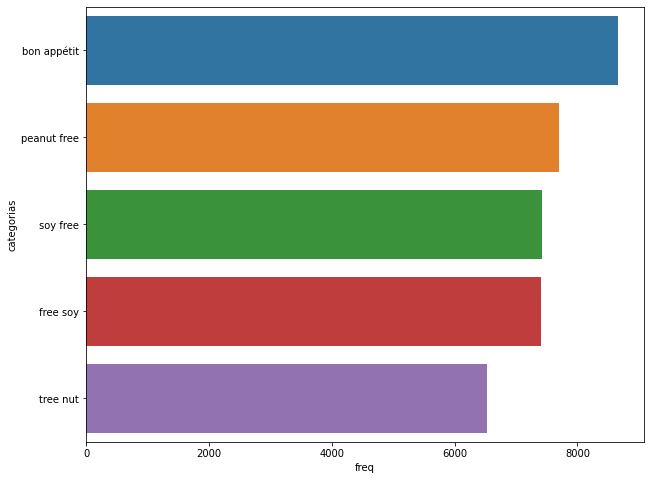

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# GRÁFICO DE BARRA HORIZONTAL DAS CATEGORIAS 
plt.figure(figsize=(10,8))
sns.barplot(x='freq',y='categorias',data=df_freq_bigram_cate.iloc[:5,:])
plt.show()

**Nuvem de palavras das instruções  de receitas mais frequentes**

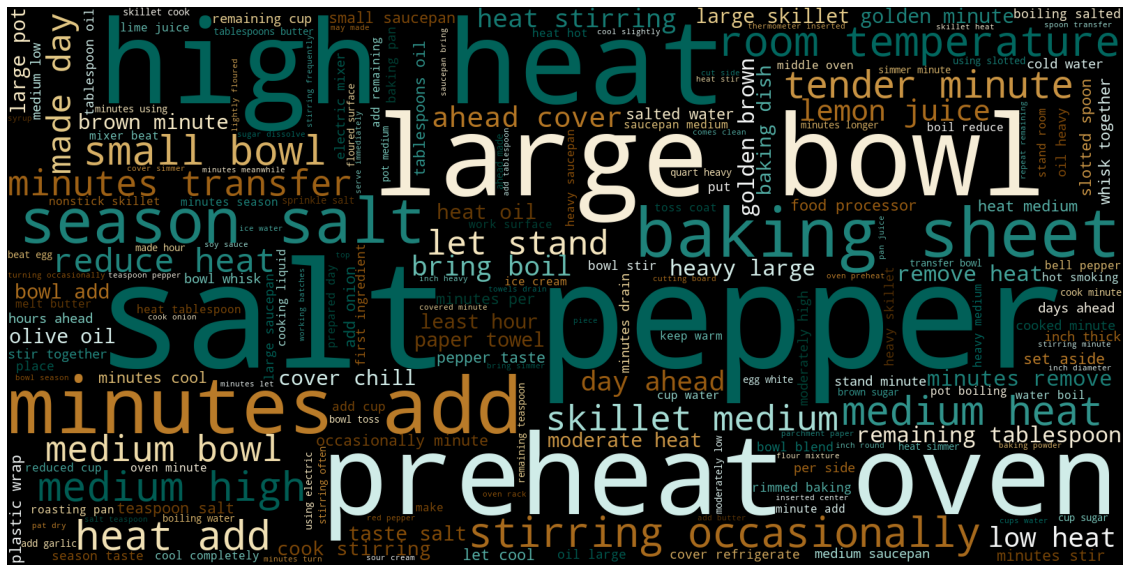

In [66]:
from wordcloud import WordCloud

# FAZENDO WORDCLOUD DAS INSTRUÇÕES
wordcloud = WordCloud(width=1600, height=800,random_state=42,background_color='black',colormap='BrBG_r').generate(todos_comentarios_directions)

fig, ax = plt.subplots(figsize=(20,15))
ax.imshow(wordcloud)#, interpolation='bilinear')
ax.set_axis_off()

**As 10 melhores receitas quanto ao somatório de avaliações**


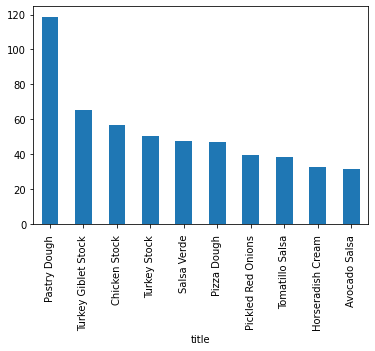

In [67]:
dt.groupby(['title']).rating.sum().sort_values(ascending=False)[:10].plot(kind='bar')

**Os 10 ingredientes mais frequentes nas receitas**

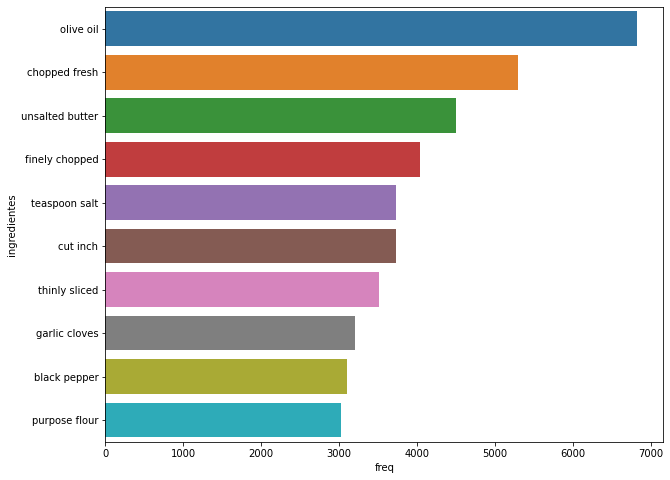

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# GRÁFICO DE BARRA HORIZONTAL DAS CATEGORIAS 
plt.figure(figsize=(10,8))
sns.barplot(x='freq',y='ingredientes',data=df_freq_bigram_ing.iloc[:10,:])
plt.show()

**Rank das 3 receitas que tem mais frequência**


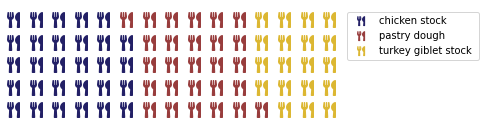

In [69]:
data = dt_.title.value_counts()[:3].to_dict()
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#232066", "#983D3D", "#DCB732"),
                values=data, icons="utensils", icon_size=16,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();

**A quantidade receitas por cada ano**

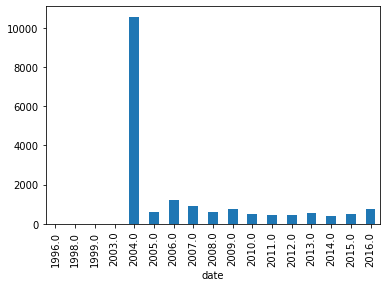

In [70]:
dt_.groupby(dt_["date"].dt.year)["title"].count().plot(kind='bar')

**A quantidade receitas por cada mês**

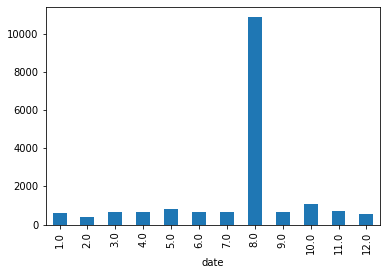

In [71]:
dt_.groupby(dt_["date"].dt.month)["title"].count().plot(kind='bar')

**Recomendação de receitas com máxima avaliação, e gordura e sódio abaixo da média**

In [72]:
#Utilizando dos dados obtidos na sessão de outliers
# iremos agora filtrar receitas com gordura e sódio bem abaixo da média, e com nota máxima avaliação
recomen = dt_.query("rating == 5.0 & fat < 26.0  & sodium < 631.0")


In [73]:
recomen['title'].value_counts()[:20]

turkey giblet stock                                       5
pastry dough                                              5
champagne punch                                           3
sweet pastry dough                                        2
chicken stock                                             2
rosemary shortbread                                       2
baltimore eggnog                                          2
vegetable stock                                           2
brandied whipped cream                                    2
saffron mayonnaise                                        2
sangria                                                   2
turkey stock                                              2
sour cream ice cream                                      2
love                                                      2
avocado salsa                                             2
raspberry sauce                                           2
potato latkes                           

**Analisando notas altas e baixas das receitas**

In [74]:
notaalta = dt_.query("rating >= 4.0")
notabaixa = dt_.query("rating <= 3.0")

In [75]:
notaalta.isnull().sum()

directions        0
fat            1879
date              0
categories        0
calories       1867
desc           2993
protein        1876
rating            0
title             0
ingredients       0
sodium         1867
dtype: int64

In [76]:
notabaixa.isnull().sum()

directions       0
fat            687
date             0
categories       0
calories       654
desc           893
protein        674
rating           0
title            0
ingredients      0
sodium         654
dtype: int64

É notório que o dataset que contém as melhores avaliações falta quantidade de informação superior ao dataset que possui as piores avaliações de receitas, e a falta de informações valiosas como: gordura, calorias, proteina e sódio.

Entendendo que tais informações faltantes podem estarem correlaciondas com as notas das respectivas receitas, a seguir segue analise da: gordura, calorias, proteina e sódio de ambos dataset recém criados.

**Gordura vs Calorias vs Proteina vs Sódio**

Teve-se a ideia de realizar a plotagem de gráfico para descobrir se existia algum padrão no dataset. Assim sendo, segui as observações:

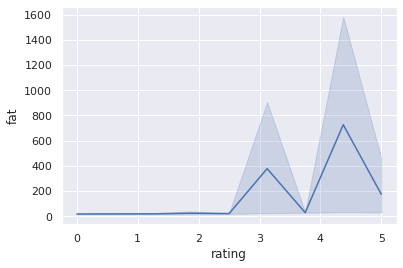

In [77]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=dt_['rating'],y=dt_['fat'])
plt.show()

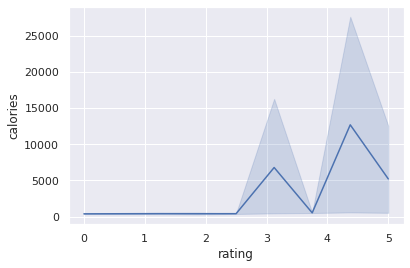

In [78]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=dt_['rating'],y=dt_['calories'])
plt.show()

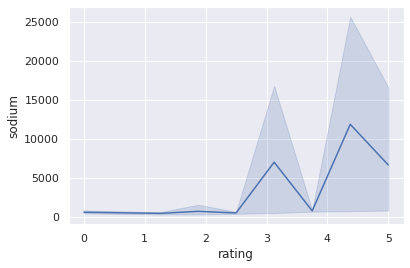

In [79]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=dt_['rating'],y=dt_['sodium'])
plt.show()

Ao observar os gráficos é identifcado dois picos de sódio e calorias são muito semelhantes. É percebido que quando há o primeiro pio, o rating está pontua aproximadamente 3, ambos estão acima do valor **5000**, já a gordura também tem o primeiro pico praticamente no mesmo rating dos demais, mas a diferença é que o valor do pico do mesmo chega a ser acima de **250**.

Já o segundo pico, tanto o sódio, calorias e gordura estão aproximadamente no rating 4.4, todavia apenas sódio e calorias estão acima do valor **10000**, a gordura está a acima do valor **500**.

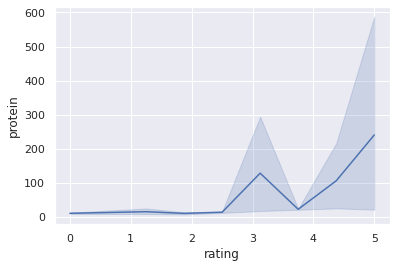

In [80]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=dt_['rating'],y=dt_['protein'])
plt.show()

Quando falamos das proteinas é notório que quando houve aumento crescente dela, a nota da receita chegou ao máximo, e isso ocorreu no segundo pico em que o valor da proteina estava aproximadamente em **250**>

**Notas Altas vs Notas Baixas**

**Será que quanto menos gordura a receita tiver, melhor a sua avaliação?**

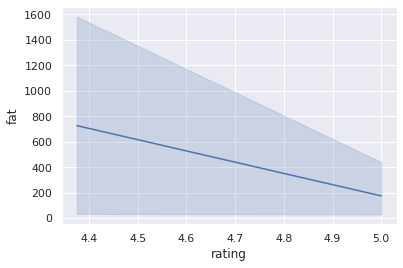

In [81]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=notaalta['rating'],y=notaalta['fat'])
plt.show()

Ao analisarmos somente esssa perpectiva, podemos concluir que medida que o valor de gordura vai diminuindo, a avaliação da receita aumenta, sendo possível sinal para exigente quanto ao consumir comida com baixo nível de gordura, e de fato isso é apresentado no gráfico.



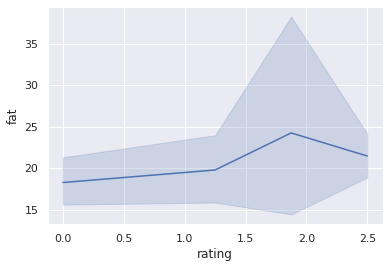

In [82]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=notabaixa['rating'],y=notabaixa['fat'])
plt.show()

Nesse gráfico é apresentado a relação de avaliação e gordura das notas baixas, e de fato a tendência aqui é mais aumentar a gordura, diferente da tendência do gráfico anterior. 

Todavia é percebido que o dataset com a menores notas de avaliação contém os valores mais baixos para gordura chegando a mesma ser ao máximo **25**, enquanto que o mínimo de gordura presente nas  notas altas está bem acima de 25, chegando aproximadamente **230**

**Será que quanto menos sódio a receita tiver, melhor a sua avaliação?**

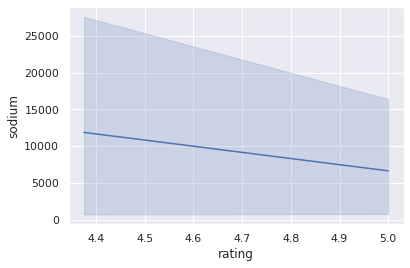

In [83]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=notaalta['rating'],y=notaalta['sodium'])
plt.show()

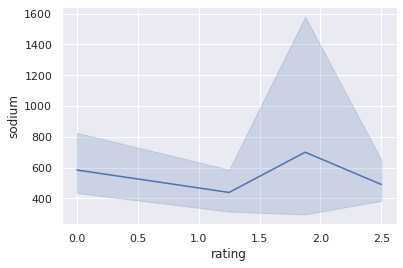

In [84]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=notabaixa['rating'],y=notabaixa['sodium'])
plt.show()

Ao observar os dois gráficos novamente é reparado que o dataset com a menores notas de avaliação contém os valores mais baixos para sódio chegando a ser valor maior que **600**, enquanto que o mínimo de sódio presente nas  notas altas está a acima **5000**.

**Será que quanto menos calorias a receita tiver, melhor a sua avaliação?**

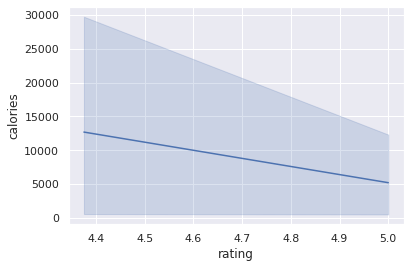

In [85]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=notaalta['rating'],y=notaalta['calories'])
plt.show()

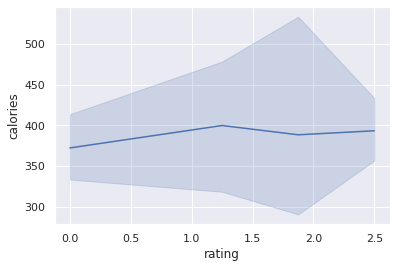

In [86]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=notabaixa['rating'],y=notabaixa['calories'])
plt.show()

Ao observar os dois gráficos novamente é reparado que talvez as calorias não tenham tanto impacto nas avaliações das receitas, porque dataset com a menores notas de avaliação contém os valores mais baixos para calorias chegando a ser valor maior que **400**, enquanto que o mínimo de calorias presente nas notas altas é de **5000**.

**E quanto as proteinas, será que quanto mais proteinas a receita tiver, melhor a sua avaliação?**

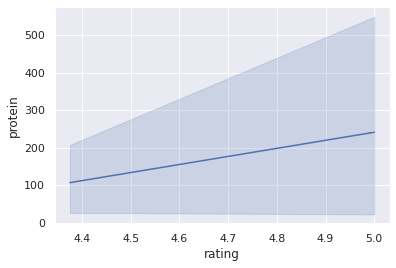

In [87]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=notaalta['rating'],y=notaalta['protein'])
plt.show()

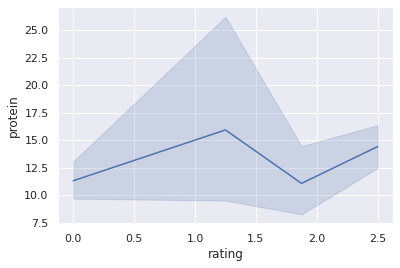

In [88]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=notabaixa['rating'],y=notabaixa['protein'])
plt.show()

Note que as avaiações chegam ao máximo quando chegam aproximadamente em **250**. E o datasete de notas baixas de fato não possui tão alta quantidade de proteínas em suas respectivas receitas.

Desse modo, o contéudo protéico presente nas receitas são levadas em considerações para adicionar determinada pontuação de avalição para respectiva receita.

Então a resposta para a pergunta sobre proteínas é SIM, quanto mais proteina a receita tiver mais probabilidade da mesma obter melhor nota de avaliação.